 ## Step 1: Data Cleaning
 ## Let's proceed with data cleaning steps. We'll use Python and popular libraries like Pandas and scikit-learn.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [56]:
# Load dataset into a Pandas DataFrame
df = pd.read_csv('heart.csv')


In [57]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [58]:
# Display the first few rows of the dataset
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Finding missing value dataset
## Step 2 :

In [59]:
# Check for missing values
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Cleaning
## In this case, assume the dataset is already  clean (no missing values). We'll proceed with feature scaling.

## Step 3: Feature Scaling

In [60]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']


In [61]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [63]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Step 4: Applying Classification Algorithms
## Let's apply various classification algorithms using scikit-learn.

## Example with Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model
model = LogisticRegression()

In [65]:
# Train the model
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [66]:
# Predictions on the test set
y_pred = model.predict(X_test_scaled)


In [67]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression: {accuracy:.2f}')


Accuracy of Logistic Regression: 0.85


In [68]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier()


In [69]:
# Train the model
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier()

In [70]:
# Predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)


In [71]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest Classifier: {accuracy_rf:.2f}')


Accuracy of Random Forest Classifier: 0.85


In [72]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [73]:
# Function to evaluate and print results
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix')

In [74]:
# Initialize and train models
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_scaled, y_train)


LogisticRegression()

In [75]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier()

Logistic Regression Model:
Accuracy: 0.85


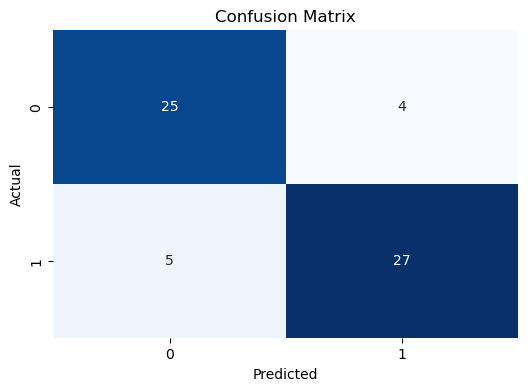

In [76]:
# Evaluate models
print('Logistic Regression Model:')
evaluate_model(log_reg_model, X_test_scaled, y_test)


Random Forest Classifier:
Accuracy: 0.85


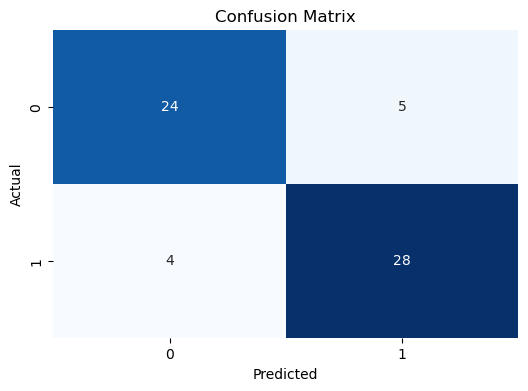

In [77]:
print('Random Forest Classifier:')
evaluate_model(rf_model, X_test_scaled, y_test)

               age  trestbps      chol   thalach   oldpeak    target
age       1.000000  0.279351  0.213678 -0.398522  0.210013 -0.225439
trestbps  0.279351  1.000000  0.123174 -0.046698  0.193216 -0.144931
chol      0.213678  0.123174  1.000000 -0.009940  0.053952 -0.085239
thalach  -0.398522 -0.046698 -0.009940  1.000000 -0.344187  0.421741
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000 -0.430696
target   -0.225439 -0.144931 -0.085239  0.421741 -0.430696  1.000000


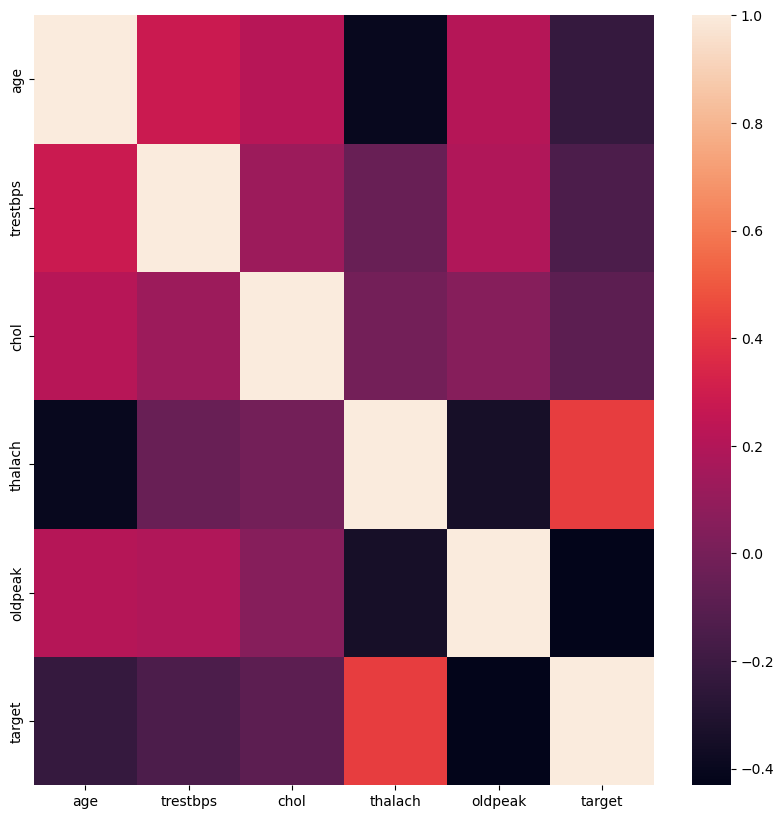

In [79]:
heat_data = df[["age","trestbps","chol","thalach","oldpeak","target"]].copy()
print(heat_data.corr())
plt.figure(figsize=(10,10))
sns.heatmap(cont_data.corr())
plt.show()

In [95]:
plt.figure(figsize=(7,7))
data = df.age.value_counts().to_frame()
textprops = {"fontsize":15}
data.head(10).age.plot(kind='pie',autopct='%1.1f%%',textprops =textprops )

plt.title("Age Categories",fontsize = 20)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'age'

<Figure size 700x700 with 0 Axes>